In [ ]:
from tensorflow.keras.applications import ResNet101
model1 = ResNet101(include_top=False, weights=None, input_shape=(224,224, 3))
model1.trainable = False

In [ ]:
import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, ZeroPadding2D, GlobalAveragePooling2D, DepthwiseConv2D
from tensorflow.keras import optimizers
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
model2 = Sequential([model])
model2.add(Flatten())
model2.add(Dense(units=1024,activation="relu"))
model2.add(Dense(units=1024,activation="relu"))
model2.add(Dense(units=1, activation="sigmoid"))
model2.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.save("./tn_model/com_last_model.h5")

In [ ]:
model2 = Sequential([model1])
model2.add(Flatten())
model2.add(Dense(units=1024,activation="relu"))
model2.add(Dense(units=1024,activation="relu"))
model2.add(Dense(units=1, activation="sigmoid"))
model2.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.trainable = False
model2.summary()

In [8]:
model = load_model("./tn_model/last_model.h5")
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
###########################################################
# 데이터 전처리
###########################################################


train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./dataset/train3"
validation_dir = './dataset/vali3'

batch_size = 16
# batch_size = 64


train_generator = train_datagen.flow_from_directory( \
        train_dir,                  # 타깃 디렉터리
        target_size=(224, 224),     # 모든 이미지를 224 × 224 크기
        batch_size=batch_size,
        class_mode='binary')        #

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 1276 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

배치 데이터 크기: (16, 224, 224, 3)
배치 레이블 크기: (16,)


In [11]:
steps_per_epochs = 80 # 학습데이터의 총 개수 / 배치 사이즈 (소수점 올림)
epochs = 15

history = model2.fit(
      train_generator ,
      steps_per_epoch=steps_per_epochs  ,
      epochs=epochs ,
      validation_data=validation_generator,
      validation_steps=18)

Epoch 1/15
80/80 [==============================] - 34s 306ms/step - loss: 0.5181 - accuracy: 0.7978 - val_loss: 0.7872 - val_accuracy: 0.6084
Epoch 2/15
80/80 [==============================] - 10s 125ms/step - loss: 0.1750 - accuracy: 0.9655 - val_loss: 0.8573 - val_accuracy: 0.7168
Epoch 3/15
80/80 [==============================] - 10s 128ms/step - loss: 0.2483 - accuracy: 0.9303 - val_loss: 1.1761 - val_accuracy: 0.5245
Epoch 4/15
80/80 [==============================] - 10s 130ms/step - loss: 0.1271 - accuracy: 0.9687 - val_loss: 1.4465 - val_accuracy: 0.5385
Epoch 5/15
80/80 [==============================] - 11s 132ms/step - loss: 0.1056 - accuracy: 0.9781 - val_loss: 1.0575 - val_accuracy: 0.7098
Epoch 6/15
80/80 [==============================] - 11s 132ms/step - loss: 0.1693 - accuracy: 0.9577 - val_loss: 1.0202 - val_accuracy: 0.6888
Epoch 7/15
80/80 [==============================] - 17s 212ms/step - loss: 0.1245 - accuracy: 0.9718 - val_loss: 0.9618 - val_accuracy: 0.6888

In [15]:
model.save("./tn_model/last_model_retrain.h5")

D:\Program Files\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


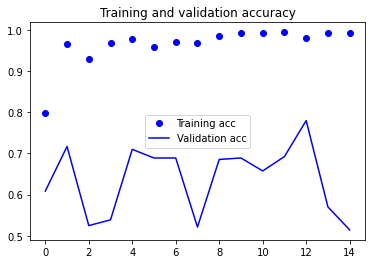

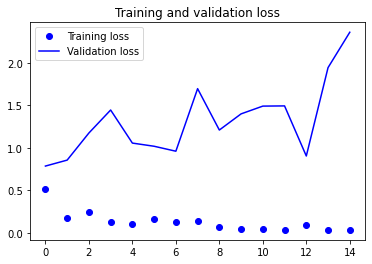

In [13]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()